In [3]:
import pandas as pd

# 3.1 — Carga un CSV de ejemplo (puede ser tu propio archivo)
df = pd.read_csv('C:/Users/uribe/OneDrive/Escritorio/AI_Mayordomo/venv/Customer.csv')

# 3.2 — Echa un vistazo a las primeras filas
print(df.head())

# 3.3 — Estadísticas descriptivas
print(df.describe())


  Customer ID    Customer Name    Segment  Age        Country  \
0    CG-12520      Claire Gute   Consumer   67  United States   
1    DV-13045  Darrin Van Huff  Corporate   31  United States   
2    SO-20335   Sean O'Donnell   Consumer   65  United States   
3    BH-11710  Brosina Hoffman   Consumer   20  United States   
4    AA-10480     Andrew Allen   Consumer   50  United States   

              City           State  Postal Code Region  
0        Henderson        Kentucky        42420  South  
1      Los Angeles      California        90036   West  
2  Fort Lauderdale         Florida        33311  South  
3      Los Angeles      California        90032   West  
4          Concord  North Carolina        28027  South  
              Age   Postal Code
count  793.000000    793.000000
mean    44.467844  55229.717528
std     15.526673  31679.223816
min     18.000000   1841.000000
25%     31.000000  27217.000000
50%     45.000000  55901.000000
75%     58.000000  90004.000000
max     70.

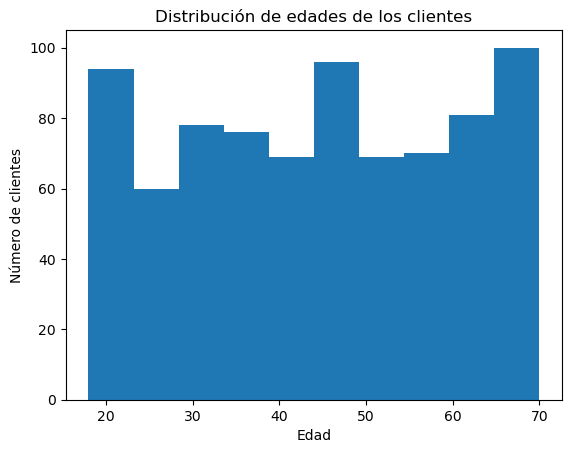

In [5]:
# Histograma de la columna "Age"
plt.hist(df['Age'], bins=10)
plt.title('Distribución de edades de los clientes')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.show()

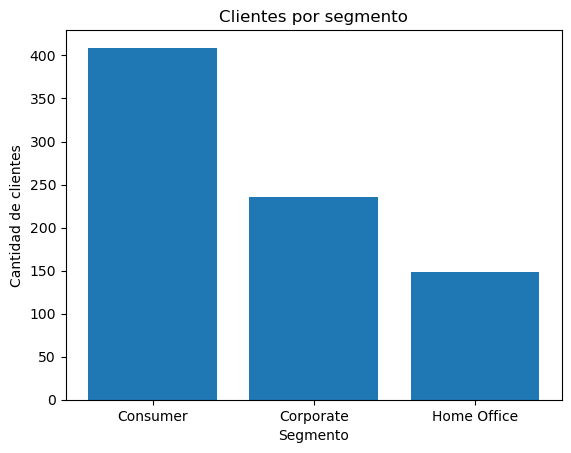

In [6]:
# Conteo de cada segmento
counts = df['Segment'].value_counts()

# Gráfico de barras
plt.bar(counts.index, counts.values)
plt.title('Clientes por segmento')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de clientes')
plt.show()

MSE en test: 255.65
Coeficiente (Postal Code → Age): 0.0000
Intercepto: 43.4306


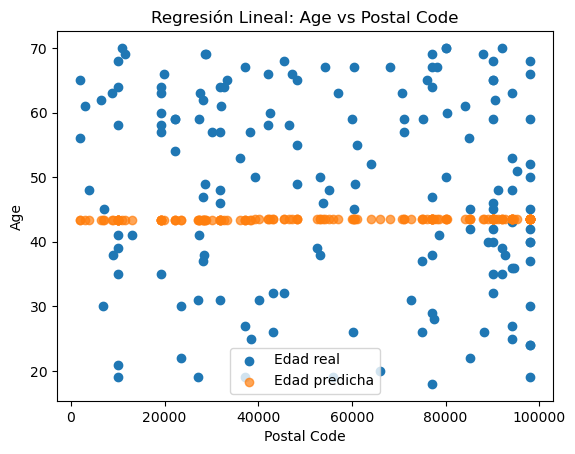

In [7]:
# 1. Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Definir features (X) y target (y)
# Nota: aquí usamos Postal Code como variable numérica de ejemplo
X = df[['Postal Code']]   # debe ser un DataFrame 2D
y = df['Age']             # vector 1D

# 3. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 4. Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 6. Evaluar desempeño
mse = mean_squared_error(y_test, y_pred)
print(f"MSE en test: {mse:.2f}")
print(f"Coeficiente (Postal Code → Age): {model.coef_[0]:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")

# 7. Visualizar resultados reales vs predichos
import matplotlib.pyplot as plt

plt.scatter(X_test['Postal Code'], y_test, label='Edad real')
plt.scatter(X_test['Postal Code'], y_pred, label='Edad predicha', alpha=0.7)
plt.title('Regresión Lineal: Age vs Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Age')
plt.legend()
plt.show()


Random Forest MSE en test: 260.24

Importancia de cada característica:
Postal Code            0.836008
Segment_Home Office    0.084376
Segment_Corporate      0.064440
Region_South           0.009231
Region_West            0.003910
Region_East            0.002034
dtype: float64


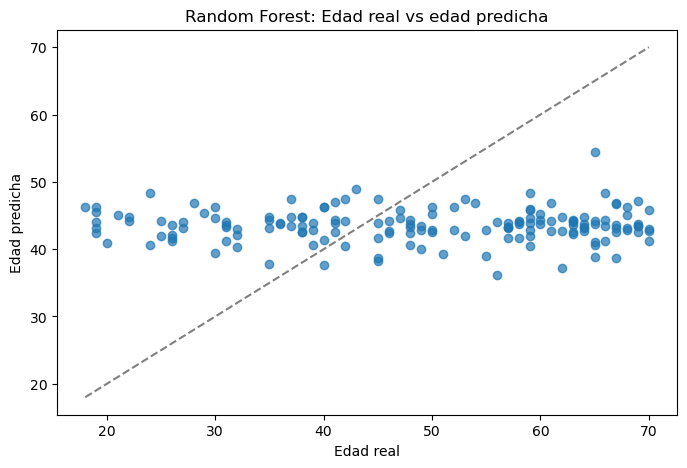

In [9]:

# 1. Crear variables dummy para Region y Segment
dummies = pd.get_dummies(df[['Region', 'Segment']], drop_first=True)

# 2. Definir X e y
#    Incluimos Postal Code + dummies
X = pd.concat([df[['Postal Code']], dummies], axis=1)
y = df['Age']

# 3. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Entrenar RandomForestRegressor
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model_rf.fit(X_train, y_train)

# 5. Predicción y evaluación
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE en test: {mse_rf:.2f}")

# 6. Importancia de características
importances = pd.Series(
    model_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)
print("\nImportancia de cada característica:")
print(importances)

# 7. Visualización real vs predicho
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='gray')
plt.title('Random Forest: Edad real vs edad predicha')
plt.xlabel('Edad real')
plt.ylabel('Edad predicha')
plt.show()
